In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv(r'df.csv',index_col=0,header=0)
areas = ['Negócios','E. Comp','E. Biomed','E. Materiais','Biotec']
contratou = ['Stand','Palestra','Workshop']

df.replace(np.nan, False, inplace=True)
df.replace('X', True, inplace=True)

df['Stand'] = df['Contratou'].str.lower().str.contains('stand')
df['Palestra'] = df['Contratou'].str.lower().str.contains('palestra')
df['Workshop'] = df['Contratou'].str.lower().str.contains('workshop')
df = df.drop(columns='Contratou')

#Retirando a linha Aline Santos por ser uma palestrante individual
df = df.drop(index='Aline Santos')

resultados = df[areas].sum()
total = resultados.sum()

print(f'Empresas presentes no ano passado {list(df.index)}.')


Empresas presentes no ano passado ['Pilkington', 'Cebrace', 'Kautex', 'CIEE', 'Self ', 'Enesco Expector', 'Lideraê', 'Canon ', 'GM', 'Prolind', 'Iacit', 'Geopixel', 'INAEE', 'Mottu', 'Parker ', 'Bettha'].


Representação
E. Materiais    33.333333
Negócios        23.809524
E. Comp         23.809524
E. Biomed         9.52381
Biotec            9.52381


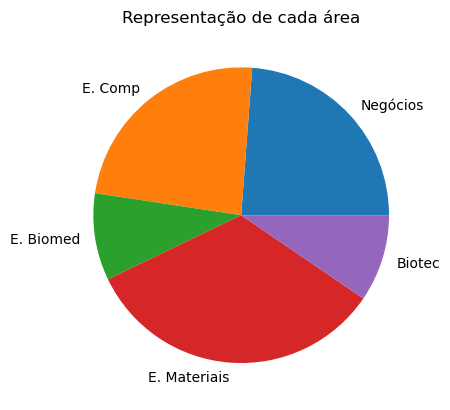

In [2]:
# Mostra as áreas que foram mais representadas
print('Representação')
print((100*resultados/total).sort_values(ascending=False).to_string())
resultados.plot(kind='pie', title='Representação de cada área')
plt.show()


Serviços mais contratados
Stand       11
Palestra     7
Workshop     1


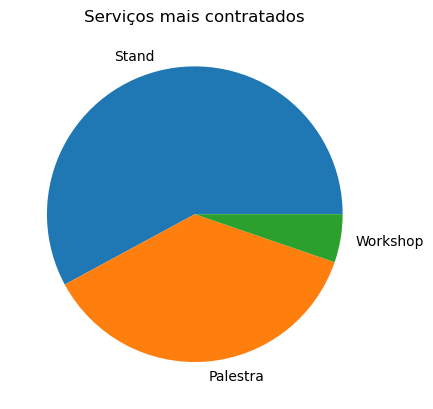

In [3]:
# Quais serviçoes foram contratados
print('Serviços mais contratados')
servicosMaisContratados = df[contratou].sum().sort_values(ascending=False)
print(servicosMaisContratados.to_string())
servicosMaisContratados.plot(kind='pie', title='Serviços mais contratados')
plt.show()


In [4]:
# Mostra as áreas que contrataram mais stands
print('Áreas que contrataram mais stands')
areas_stand = df[df['Stand']][areas].sum()
print(areas_stand.sort_values(ascending=False).to_string())


Áreas que contrataram mais stands
E. Materiais    5
Negócios        3
E. Comp         3
E. Biomed       1
Biotec          1


In [5]:
# Mostra as áreas que contrataram mais palestras
print('Áreas que contrataram mais palestras')
areas_palestra = df[df['Palestra']][areas].sum()
print(areas_palestra.sort_values(ascending=False).to_string())


Áreas que contrataram mais palestras
Negócios        3
E. Materiais    3
E. Comp         2
E. Biomed       1
Biotec          1


In [6]:
# Mostra as áreas que contrataram mais workshops
print('Áreas que contrataram mais workshops')
areas_workshop = df[df['Workshop']][areas].astype(int).sum()
print(areas_workshop.sort_values(ascending=False).to_string())


Áreas que contrataram mais workshops
Negócios        1
E. Comp         1
E. Biomed       0
E. Materiais    0
Biotec          0


Áreas com maior probabilidade de contratarem serviços
Negócios        29.4
E. Comp         25.2
E. Biomed       21.0
E. Materiais    24.0
Biotec          21.0


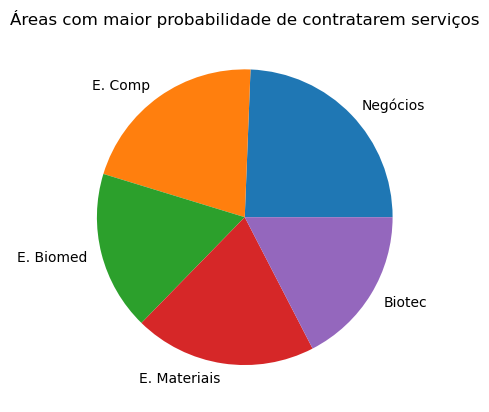

In [7]:
# Mostra as áreas que contrataram mais servicos
print('Áreas com maior probabilidade de contratarem serviços')
areas_servicos = areas_palestra + areas_stand + areas_workshop
areas_servicos = areas_servicos/(resultados/total)
print(areas_servicos.to_string())
areas_servicos.plot(kind='pie', title='Áreas com maior probabilidade de contratarem serviços')
plt.show()

In [8]:
teste = df[areas].apply(lambda row: ', '.join(list(row[row == True].index)), axis=1)
teste.to_csv('output.xlsx', index=True)